In [1]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv("data/metabolism_gene_pairs_network.csv", header=None)

In [14]:
df.columns = ['gene_combos']

In [15]:
df.head()

,gene_combos
0,"Neurog1,Neurod1,Atoh1"
1,"Set,Adc"
2,"Sdsl,Spin"
3,"Btk,Bcr"
4,"Impact,Vdr"


In [27]:
df.iloc[0, 0].split(",")

['Neurog1', 'Neurod1', 'Atoh1']

In [8]:
from itertools import combinations, permutations

In [9]:
a = [1, 2, 4]


In [13]:
print list(permutations(a, 2))

[(1, 2), (1, 4), (2, 1), (2, 4), (4, 1), (4, 2)]


In [66]:
def separator(col):
    item_list = col.split(",")
    return list(permutations(item_list, 2))
def separator_comb(col):
    item_list = col.split(",")
    return list(combinations(item_list, 2))

In [29]:
df['separate'] = df['gene_combos'].apply(separator)

In [67]:
df['combinations'] = df['gene_combos'].apply(separator_comb)

In [68]:
df['combinations']

0        [(Neurog1, Neurod1), (Neurog1, Atoh1), (Neurod...
1                                             [(Set, Adc)]
2                                           [(Sdsl, Spin)]
3                                             [(Btk, Bcr)]
4                                          [(Impact, Vdr)]
5                                            [(Bche, Nte)]
6                                             [(Lat, Set)]
7                                           [(Apc, Pros1)]
8             [(Mmp2, Mmp12), (Mmp2, Mmp9), (Mmp12, Mmp9)]
9                                            [(Il6, Igf1)]
10                                         [(Cd4, Impact)]
11                                        [(Impact, Rest)]
12                                        [(Atp7a, Atp7b)]
13                                             [(Ii, Set)]
14                                            [(Gls, Rho)]
15                                         [(Impact, Cck)]
16              [(Gpr74, Camp), (Gpr74, Cat), (Camp, Cat

In [69]:
df.head()

,gene_combos,separate,gene_list,combinations
0,"Neurog1,Neurod1,Atoh1","[(Neurog1, Neurod1), (Neurog1, Atoh1), (Neurod...","[Neurog1, Neurod1, Atoh1]","[(Neurog1, Neurod1), (Neurog1, Atoh1), (Neurod..."
1,"Set,Adc","[(Set, Adc), (Adc, Set)]","[Set, Adc]","[(Set, Adc)]"
2,"Sdsl,Spin","[(Sdsl, Spin), (Spin, Sdsl)]","[Sdsl, Spin]","[(Sdsl, Spin)]"
3,"Btk,Bcr","[(Btk, Bcr), (Bcr, Btk)]","[Btk, Bcr]","[(Btk, Bcr)]"
4,"Impact,Vdr","[(Impact, Vdr), (Vdr, Impact)]","[Impact, Vdr]","[(Impact, Vdr)]"


In [70]:
comb_metab = list()
for lst in df['combinations'].values:
    for tup in lst:
        comb_metab.append(tup)
        
comb_metab

[('Neurog1', 'Neurod1'),
 ('Neurog1', 'Atoh1'),
 ('Neurod1', 'Atoh1'),
 ('Set', 'Adc'),
 ('Sdsl', 'Spin'),
 ('Btk', 'Bcr'),
 ('Impact', 'Vdr'),
 ('Bche', 'Nte'),
 ('Lat', 'Set'),
 ('Apc', 'Pros1'),
 ('Mmp2', 'Mmp12'),
 ('Mmp2', 'Mmp9'),
 ('Mmp12', 'Mmp9'),
 ('Il6', 'Igf1'),
 ('Cd4', 'Impact'),
 ('Impact', 'Rest'),
 ('Atp7a', 'Atp7b'),
 ('Ii', 'Set'),
 ('Gls', 'Rho'),
 ('Impact', 'Cck'),
 ('Gpr74', 'Camp'),
 ('Gpr74', 'Cat'),
 ('Camp', 'Cat'),
 ('Tank', 'Tbk1'),
 ('Impact', 'Hr'),
 ('Impact', 'Crp'),
 ('Hr', 'Crp'),
 ('Impact', 'Galt'),
 ('Impact', 'Mc1r'),
 ('Impact', 'Slc24a5'),
 ('Mc1r', 'Slc24a5'),
 ('Gjb1', 'Gja1'),
 ('Impact', 'Ct'),
 ('Il6', 'Hc'),
 ('Sdhb', 'Pgls'),
 ('Egfr', 'Ct'),
 ('Set', 'Clock'),
 ('Cd4', 'Cd14'),
 ('Polg', 'Rnaseh1'),
 ('Polg', 'Polg2'),
 ('Rnaseh1', 'Polg2'),
 ('Degs1', 'Set'),
 ('Rest', 'Clock'),
 ('Pin1', 'Jun'),
 ('Pin1', 'Mcl1'),
 ('Pin1', 'Hes5'),
 ('Pin1', 'Fbxw7'),
 ('Jun', 'Mcl1'),
 ('Jun', 'Hes5'),
 ('Jun', 'Fbxw7'),
 ('Mcl1', 'Hes5'),
 ('Mcl1', 

In [71]:
gene_combos = pd.DataFrame(np.array(comb_metab))

In [73]:
gene_combos.to_csv("~/Desktop/metabolic_genes_deux.csv")

In [49]:
import networkx as nx

In [50]:
def make_list(col):
    return col.split(",")

In [51]:
df['gene_list'] = df['gene_combos'].apply(make_list)

In [55]:
metab_dict = {item[0]: item[1:] for item in df['gene_list'].values}

In [37]:
resp = list()
for lst in df['separate'].values:
    for tup in lst:
        resp.append(tup)
        
resp

[('Neurog1', 'Neurod1'),
 ('Neurog1', 'Atoh1'),
 ('Neurod1', 'Neurog1'),
 ('Neurod1', 'Atoh1'),
 ('Atoh1', 'Neurog1'),
 ('Atoh1', 'Neurod1'),
 ('Set', 'Adc'),
 ('Adc', 'Set'),
 ('Sdsl', 'Spin'),
 ('Spin', 'Sdsl'),
 ('Btk', 'Bcr'),
 ('Bcr', 'Btk'),
 ('Impact', 'Vdr'),
 ('Vdr', 'Impact'),
 ('Bche', 'Nte'),
 ('Nte', 'Bche'),
 ('Lat', 'Set'),
 ('Set', 'Lat'),
 ('Apc', 'Pros1'),
 ('Pros1', 'Apc'),
 ('Mmp2', 'Mmp12'),
 ('Mmp2', 'Mmp9'),
 ('Mmp12', 'Mmp2'),
 ('Mmp12', 'Mmp9'),
 ('Mmp9', 'Mmp2'),
 ('Mmp9', 'Mmp12'),
 ('Il6', 'Igf1'),
 ('Igf1', 'Il6'),
 ('Cd4', 'Impact'),
 ('Impact', 'Cd4'),
 ('Impact', 'Rest'),
 ('Rest', 'Impact'),
 ('Atp7a', 'Atp7b'),
 ('Atp7b', 'Atp7a'),
 ('Ii', 'Set'),
 ('Set', 'Ii'),
 ('Gls', 'Rho'),
 ('Rho', 'Gls'),
 ('Impact', 'Cck'),
 ('Cck', 'Impact'),
 ('Gpr74', 'Camp'),
 ('Gpr74', 'Cat'),
 ('Camp', 'Gpr74'),
 ('Camp', 'Cat'),
 ('Cat', 'Gpr74'),
 ('Cat', 'Camp'),
 ('Tank', 'Tbk1'),
 ('Tbk1', 'Tank'),
 ('Impact', 'Hr'),
 ('Impact', 'Crp'),
 ('Hr', 'Impact'),
 ('Hr', 'C

In [43]:
new_resp = np.array(resp)

In [44]:
new_resp.shape

(69620, 2)

In [46]:
gene_pairs = pd.DataFrame(new_resp)

In [47]:
gene_pairs.head()

,0,1
0,Neurog1,Neurod1
1,Neurog1,Atoh1
2,Neurod1,Neurog1
3,Neurod1,Atoh1
4,Atoh1,Neurog1


In [48]:
gene_pairs.to_csv("~/Desktop/metabolic_genes.csv")

In [56]:
metab_dict

{'Sorl1': ['Set',
  'Inpp5d',
  'Pld3',
  'Cd33',
  'Epha1',
  'Cd2ap',
  'Mef2c',
  'Ptk2b',
  'Trem2',
  'Dsg2',
  'Clu',
  'Bin1',
  'Picalm'],
 'Cygb': ['Mb'],
 'Sdsl': ['Spin'],
 'Wrn': ['Recql4'],
 'Wrb': ['Caml'],
 'Shank3': ['Shank2'],
 'Sos2': ['Rasgrp1', 'Sos1', 'Rasgrp4', 'Son'],
 'Sos1': ['Ptpn11', 'Nras', 'Cbl', 'Shoc2', 'Braf', 'Raf1'],
 'Pkd2': ['Pkd1', 'Prkcsh', 'Sec63'],
 'Drd4': ['Set'],
 'Drd2': ['Drd3'],
 'Gpx1': ['Selp'],
 'B2m': ['Tbp', 'Actb', 'C6', 'Hprt1'],
 'Bcl9': ['Rho'],
 'Ngfr': ['Abcb5'],
 'Mitf': ['Nras', 'Braf'],
 'Hes1': ['Notch2'],
 'Hes3': ['Stat3'],
 'Aqp11': ['Aqp12'],
 'Bcl2': ['Sod1'],
 'Xist': ['Kcnq1ot1'],
 'Ube3a': ['Set'],
 'Akt1': ['Cope'],
 'Akt2': ['Insr', 'Snap23', 'Irs1', 'Rac1'],
 'Igf2': ['Sst', 'Igf1'],
 'Ace2': ['Ace'],
 'Col10a1': ['Set'],
 'Cebpa': ['Npm1', 'Mll', 'Nup98'],
 'Sost': ['Wnt3',
  'Clcn7',
  'Wnt4',
  'Sp7',
  'Foxl1',
  'Wnt16',
  'Jag1',
  'Ctnnb1',
  'Axin1',
  'Lrp5',
  'Mef2c',
  'Runx2',
  'Foxc2',
  'Lrp4',
  'E

In [57]:
G = nx.from_dict_of_lists(metab_dict)

In [59]:
nx.write_gml(G, 'metab.gml')

In [74]:
sub_dict = {k:v for k, v in metab_dict.items() if k == 'Sos2' or k == "Sos1"}

In [75]:
G2 = nx.from_dict_of_lists(sub_dict)

In [76]:
nx.write_gml(G2, 'sub_metab.gml')

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

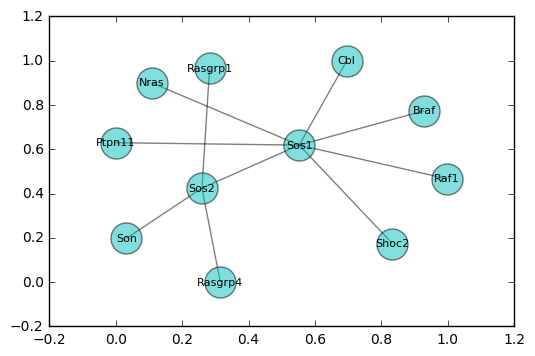

In [89]:

nx.draw_networkx(G2, alpha=0.5, edge_color='k', node_color='c', font_size=8, node_size=500)
plt.show()